In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_csv("1987.csv")
data.head()

,day,number_of_strikes,center_point
0,1/1/1987,21,POINT(-80.7 26)
1,1/4/1987,23,POINT(-83.2 28.3)
2,1/5/1987,40,POINT(-78.9 31.3)
3,1/5/1987,20,POINT(-79.2 31.4)
4,1/5/1987,21,POINT(-80.1 31.4)


In [2]:
# strikes=data["number_of_strikes"]
tmp1=data.center_point.str.replace("POINT\(","")
tmp2=tmp1.str.replace("\)","")
latitude=tmp2.str.split(" ",expand=True)[0]
longitude=tmp2.str.split(" ",expand=True)[1]

In [3]:
data['latitude']=latitude.astype(float)
data['longitude']=longitude.astype(float)
data['latitudeR']=latitude.astype(float).round(0)
data['longitudeR']=longitude.astype(float).round(0)

In [4]:
data.to_csv("1987_mod.csv", index=False, header=True) 
data.head()
# print (data.dtypes)

,day,number_of_strikes,center_point,latitude,longitude,latitudeR,longitudeR
0,1/1/1987,21,POINT(-80.7 26),-80.7,26.0,-81.0,26.0
1,1/4/1987,23,POINT(-83.2 28.3),-83.2,28.3,-83.0,28.0
2,1/5/1987,40,POINT(-78.9 31.3),-78.9,31.3,-79.0,31.0
3,1/5/1987,20,POINT(-79.2 31.4),-79.2,31.4,-79.0,31.0
4,1/5/1987,21,POINT(-80.1 31.4),-80.1,31.4,-80.0,31.0


In [5]:
grouped_df=data.groupby('latitudeR')
Lat=grouped_df['latitudeR'].sum()/grouped_df['latitudeR'].count()
Gstrikes=grouped_df['number_of_strikes'].sum()

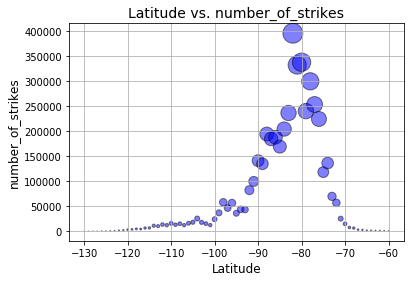

In [6]:

plt.scatter(Lat, Gstrikes, marker="o", facecolors="b", label="Suburban",edgecolors="black", s=Gstrikes/1000, alpha=0.5)
plt.title("Latitude vs. number_of_strikes",fontsize=14)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("number_of_strikes",fontsize=12)
plt.grid()
plt.savefig("LatStrikes.png")

In [7]:
grouped_df=data.groupby('longitudeR')
Lon=grouped_df['longitudeR'].sum()/grouped_df['longitudeR'].count()
Gstrikes=grouped_df['number_of_strikes'].sum()

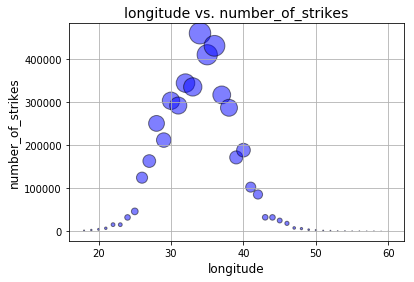

In [8]:
plt.scatter(Lon, Gstrikes, marker="o", facecolors="b", label="Suburban",edgecolors="black", s=Gstrikes/1000, alpha=0.5)
plt.title("longitude vs. number_of_strikes",fontsize=14)
plt.xlabel("longitude",fontsize=12)
plt.ylabel("number_of_strikes",fontsize=12)
plt.grid()
plt.savefig("LonStrikes.png")